# Chapter 09 - IPython Sessions

## Writing to a Text File:

In [1]:
# create accounts.txt and 5 client records
with open('accounts.txt', mode='w') as accounts:
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345.67\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400 Stone -42.16\n')
    accounts.write('500 Rich 224.62\n')

In [4]:
# write three records of student's grades to a file called grades.txt

with open('grades.txt', mode='w') as accounts:
    accounts.write('1 Red A\n')
    accounts.write('2 Green B\n')
    accounts.write('3 White A\n')

## Reading Data from a Text File

In [5]:
# read data from accounts.txt
with open('accounts.txt', mode='r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


### Self Check

In [7]:
# read data from grades.txt
with open('grades.txt', mode='r') as grades:
    print(f'{"ID":<5}{"Name":<10}{"Grade":>6}')
    for student in grades:
        st_id, name, grade = student.split()
        print(f'{st_id:<5}{name:<10}{grade:>6}')

ID   Name       Grade
1    Red            A
2    Green          B
3    White          A


## Updating Text Files

In [8]:
accounts = open('accounts.txt', 'r')

In [11]:
temp_file = open('temp_file.txt', 'w') # create a temp file

In [12]:
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')

## Serialization with JSON

In [13]:
# python standard library module json
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [15]:
# serializing an object to JSON
import json

In [16]:
with open('accounts.json', mode='w') as accounts:
    json.dump(accounts_dict, accounts)

In [17]:
# deserializing the JSON text
with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)

In [20]:
accounts_json

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [21]:
# get list of dicts associated with the 'accounts' key
accounts_json['accounts']

[{'account': 100, 'name': 'Jones', 'balance': 24.98},
 {'account': 200, 'name': 'Doe', 'balance': 345.67}]

In [22]:
accounts_json['accounts'][0]

{'account': 100, 'name': 'Jones', 'balance': 24.98}

In [23]:
accounts_json['accounts'][1]

{'account': 200, 'name': 'Doe', 'balance': 345.67}

In [24]:
# Displaying the JSON Text
# using dumps with load to do a 'pretty printing'
with open('accounts.json', 'r') as accounts:
    print(json.dumps(json.load(accounts), indent=4))

{
    "accounts": [
        {
            "account": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "account": 200,
            "name": "Doe",
            "balance": 345.67
        }
    ]
}


### Self Check

In [25]:
grades_dict = {'gradebook':
              [{'student_id': 1, 'name': 'Red', 'grade': 'A'},
               {'student_id': 2, 'name': 'Green', 'grade': 'B'},
               {'student_id': 3, 'name': 'White', 'grade': 'A'}]}

In [28]:
# serialising to JSON
with open('grades.json', 'w') as grades:
    json.dump(grades_dict, grades)
    

In [29]:
# deserialising to Python object
with open('grades.json', 'r') as grades:
    grades_json = json.load(grades)

In [32]:
# pretty print dic grades_json
print(json.dumps(grades_json, indent=4))

{
    "gradebook": [
        {
            "student_id": 1,
            "name": "Red",
            "grade": "A"
        },
        {
            "student_id": 2,
            "name": "Green",
            "grade": "B"
        },
        {
            "student_id": 3,
            "name": "White",
            "grade": "A"
        }
    ]
}


## Handling Exceptions

In [39]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')

In [41]:
try_it(10.7)

int(10.7) is 10


In [43]:
try_it('Python')

Python could not be converted to an integer


### *finally* Clause

In [45]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')
    finally:
        print('finally executed.')

In [46]:
try_it(10.7)

int(10.7) is 10
finally executed.


In [47]:
try_it('Python')

Python could not be converted to an integer
finally executed.


## Working with CSV Files

#### Simple Titanic Dataset Example

In [48]:
import pandas as pd

In [52]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

In [57]:
pd.set_option('precision', 2)

In [58]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'passengerClass']

In [59]:
titanic.head()

,name,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [60]:
titanic.describe()

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


In [61]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1309 non-null   object 
 1   survived        1309 non-null   object 
 2   sex             1309 non-null   object 
 3   age             1046 non-null   float64
 4   passengerClass  1309 non-null   object 
dtypes: float64(1), object(4)
memory usage: 51.3+ KB


In [62]:
titanic.survived.describe()

count     1309
unique       2
top         no
freq       809
Name: survived, dtype: object

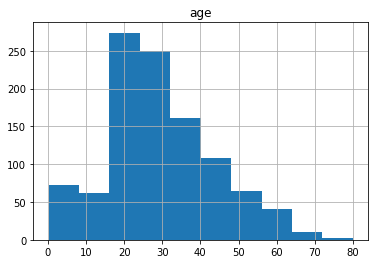

In [63]:
histogram = titanic.hist()